# Uvod do prace s datami pomocou kniznic Numpy a Pandas
* Intro do pouzivania kniznic Pandas, Matplotlib a Numpy
* Ako pouzit tieto kniznice na zakladne upravovanie formy dat (data cleaning, reshaping, wrangling)
* Velmi lahke zaklady explorativnej analyzy a prace s chybajucimi hodnotami

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

### Na co nam je Pandas?
* importovanie dat zo standardnych formatov
* vycistit
* pozriet sa do dat (statistiky, sampling, zakladne grafy)
* posunut data na analyzu / trenovanie modelov

### Co je Pandas?
* Python komunita sa inspirovala a ukradla to dobre z `data.frame` struktury v R alebo obdobnych struktur v Matlabe alebo Octave
* Umoznuje zakladne operacie s datami, sampling, group by, merge, ...
* Ako zaklad je pouzite NumPy pole

### Zakladne ulohy
* Spracovanie chybajucich udajov (.dropna(), pd.isnull())
* Merge, join (concat, join)
* Group
* Zmena tvaru dat (pivotovanie) (stack, pivot)
* Praca s casovymi radmi (resampling, timezones, ..)
* Kreslenie

## Nieco k Numpy

In [2]:
pole = [1,2,3]
pole * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [3]:
np_pole = np.array([1,2,3])
np_pole * 3

array([3, 6, 9])

In [4]:
x = np.arange(20).reshape(4, 5) # skusit viacere dimenzie
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [5]:
x.shape

(4, 5)

In [6]:
x.ndim

2

In [7]:
# spocitanie sumy po jednotlivych dimenziach
# funguju aj ine agregacne funkcie
# netreba definovat os
x.sum(axis=1)

array([10, 35, 60, 85])

## Viacero typov cisel

In [8]:
x.dtype

dtype('int32')

In [9]:
a = np.array([.1,.2])
print(a)
a.dtype

[ 0.1  0.2]


dtype('float64')

In [10]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
print(c)
c.dtype

[[ 1.+0.j  2.+0.j]
 [ 3.+0.j  4.+0.j]]


dtype('complex128')

# Rozne sposoby ako vyrobit pole

In [11]:
np.array([1,2,3])

array([1, 2, 3])

In [12]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [13]:
np.ones((2,5))

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [14]:
np.repeat(3, 10).reshape([2,5])

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

In [15]:
np.linspace(0, 2, 9)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [16]:
x = np.linspace( 0, 2*np.pi, 100 )
f = np.sin(x)
f

array([  0.00000000e+00,   6.34239197e-02,   1.26592454e-01,
         1.89251244e-01,   2.51147987e-01,   3.12033446e-01,
         3.71662456e-01,   4.29794912e-01,   4.86196736e-01,
         5.40640817e-01,   5.92907929e-01,   6.42787610e-01,
         6.90079011e-01,   7.34591709e-01,   7.76146464e-01,
         8.14575952e-01,   8.49725430e-01,   8.81453363e-01,
         9.09631995e-01,   9.34147860e-01,   9.54902241e-01,
         9.71811568e-01,   9.84807753e-01,   9.93838464e-01,
         9.98867339e-01,   9.99874128e-01,   9.96854776e-01,
         9.89821442e-01,   9.78802446e-01,   9.63842159e-01,
         9.45000819e-01,   9.22354294e-01,   8.95993774e-01,
         8.66025404e-01,   8.32569855e-01,   7.95761841e-01,
         7.55749574e-01,   7.12694171e-01,   6.66769001e-01,
         6.18158986e-01,   5.67059864e-01,   5.13677392e-01,
         4.58226522e-01,   4.00930535e-01,   3.42020143e-01,
         2.81732557e-01,   2.20310533e-01,   1.58001396e-01,
         9.50560433e-02,

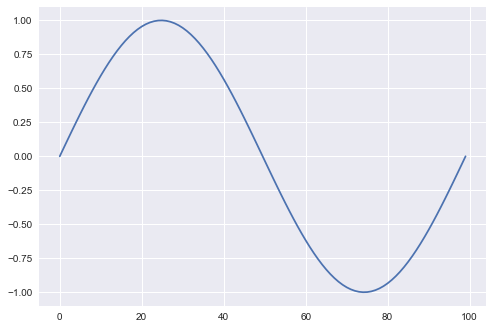

In [17]:
plt.plot(f)

## Maticove operacie

In [18]:
A = np.array( [[1,1], [0,1]] )
B = np.array( [[2,0], [3,4]] )

In [19]:
A

array([[1, 1],
       [0, 1]])

In [20]:
B

array([[2, 0],
       [3, 4]])

In [21]:
np.transpose(B)

array([[2, 3],
       [0, 4]])

In [22]:
A*B

array([[2, 0],
       [0, 4]])

In [23]:
# skutocne nasobenie matic
A.dot(B) # np.dot(A, B)

array([[5, 4],
       [3, 4]])

## Vyberanie prvkov

In [24]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [25]:
a[2]

8

In [26]:
a[2:5]

array([ 8, 27, 64], dtype=int32)

In [27]:
a[:6:2]

array([ 0,  8, 64], dtype=int32)

In [28]:
# vyber prvkov sa da pouzit aj na upravu pola
a[:6:2] = -1000
a

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,   729], dtype=int32)

In [29]:
a[ 9: 3:-1]

array([  729,   512,   343,   216,   125, -1000], dtype=int32)

## Vyberanie prvkov z viacrozmerneho pola

In [30]:
b = np.arange(20).reshape(4,5)
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [31]:
# rozmery su oddelene ciarkou
b[2,3]

13

In [32]:
b[2,]

array([10, 11, 12, 13, 14])

In [33]:
b[1:3,2:4]

array([[ 7,  8],
       [12, 13]])

In [34]:
b[:,2:4]

array([[ 2,  3],
       [ 7,  8],
       [12, 13],
       [17, 18]])

Dalsie operacie si pozrite 
* tu https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
* a tu https://docs.scipy.org/doc/numpy-dev/reference/index.html

## Nejake ukazky k Pandas

Pandas pouziva Numpy pole a nad nim si postavili typ `Series` a `DataFrame`

In [35]:
s = pd.Series([8,6,2,3,4])
s

0    8
1    6
2    2
3    3
4    4
dtype: int64

In [36]:
# k numpy polu je pridany explicitny index 
s.index

RangeIndex(start=0, stop=5, step=1)

In [37]:
s.values

array([8, 6, 2, 3, 4], dtype=int64)

In [38]:
s[0]

8

In [39]:
# na rozdiel od numpy vsak index moze byt aj nieco ine ako cislo
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int32

In [40]:
s2['c']

2

In [41]:
s2[2]

2

In [42]:
s2.c

2

In [43]:
# na vytvorenie Series objektu sa da pouzit aj asociatyvne pole
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 'United Kingdom': 64.9, 'Netherlands': 16.9})
population

Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
dtype: float64

In [44]:
population['France']

64.299999999999997

In [45]:
# kedze je to postavene na Numpy, tak vieme robit vsetky zaujimave operacie
population * 1000

Belgium           11300.0
France            64300.0
Germany           81300.0
Netherlands       16900.0
United Kingdom    64900.0
dtype: float64

In [46]:
# index ma implicitne dane poradie, takze sa da robit rozsah
population['Belgium':'Netherlands']

Belgium        11.3
France         64.3
Germany        81.3
Netherlands    16.9
dtype: float64

In [47]:
population.mean()

47.739999999999995

Da sa pristupovat k prvkom tak, ako sme na to zvyknuti z R

In [48]:
population[['France', 'Netherlands']]

France         64.3
Netherlands    16.9
dtype: float64

In [49]:
population[population > 20]

France            64.3
Germany           81.3
United Kingdom    64.9
dtype: float64

No a `DataFrame` je vlastne multidimenzionalny `Series`

In [50]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


In [51]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [52]:
countries.columns

Index(['area', 'capital', 'country', 'population'], dtype='object')

In [53]:
countries.values

array([[30510, 'Brussels', 'Belgium', 11.3],
       [671308, 'Paris', 'France', 64.3],
       [357050, 'Berlin', 'Germany', 81.3],
       [41526, 'Amsterdam', 'Netherlands', 16.9],
       [244820, 'London', 'United Kingdom', 64.9]], dtype=object)

In [54]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

In [55]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
country       5 non-null object
population    5 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


In [56]:
countries.describe()

,area,population
count,5.000000,5.000000
mean,269042.800000,47.740000
std,264012.827994,31.519645
min,30510.000000,11.300000
25%,41526.000000,16.900000
50%,244820.000000,64.300000
75%,357050.000000,64.900000
max,671308.000000,81.300000


In [57]:
countries.describe(include='all')

,area,capital,country,population
count,5.000000,5,5,5.000000
unique,NaN,5,5,NaN
top,NaN,Amsterdam,Germany,NaN
freq,NaN,1,1,NaN
mean,269042.800000,NaN,NaN,47.740000
std,264012.827994,NaN,NaN,31.519645
min,30510.000000,NaN,NaN,11.300000
25%,41526.000000,NaN,NaN,16.900000
50%,244820.000000,NaN,NaN,64.300000
75%,357050.000000,NaN,NaN,64.900000


In [58]:
countries = countries.set_index('country')
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


a vieme teraz velmi jednoducho pristupovat k jednotlivym stlpcom

In [59]:
countries.area # countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [60]:
countries['population']*1000000 / countries['area'] # hustota zaludnenia

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64

In [61]:
# vieme si jednoducho vyrobit novy stlpec
countries['density'] = countries['population']*1000000 / countries['area']
countries

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944
United Kingdom,244820,London,64.9,265.092721


In [62]:
# existuje ale aj iny sposob ako spracovat vsetky riadky
countries['area_miles'] = countries.area.apply(lambda x: x / 2.58999)
countries['area_miles']

country
Belgium            11779.968262
France            259193.278739
Germany           137857.675126
Netherlands        16033.266538
United Kingdom     94525.461488
Name: area_miles, dtype: float64

In [63]:
# ak by ste chceli mat moznost pracovat s viacerimi atributmi naraz
countries.apply(lambda x: x.area / 2.58999, axis=1)
# dalo by sa iterovat aj cez stlpce ak axis=0. Dalo by sa to pouzit napriklad na nejake pocitanie statistik po stlpcoch

country
Belgium            11779.968262
France            259193.278739
Germany           137857.675126
Netherlands        16033.266538
United Kingdom     94525.461488
dtype: float64

In [64]:
# a na zaklade neho napriklad vyberat riadky
countries[countries['density'] > 300]

,area,capital,population,density,area_miles
country,,,,,
Belgium,30510,Brussels,11.3,370.370370,11779.968262
Netherlands,41526,Amsterdam,16.9,406.973944,16033.266538


In [65]:
# vieme potom napriklad usporiadavat
countries.sort_values(by='density', ascending=False)

,area,capital,population,density,area_miles
country,,,,,
Netherlands,41526,Amsterdam,16.9,406.973944,16033.266538
Belgium,30510,Brussels,11.3,370.370370,11779.968262
United Kingdom,244820,London,64.9,265.092721,94525.461488
Germany,357050,Berlin,81.3,227.699202,137857.675126
France,671308,Paris,64.3,95.783158,259193.278739


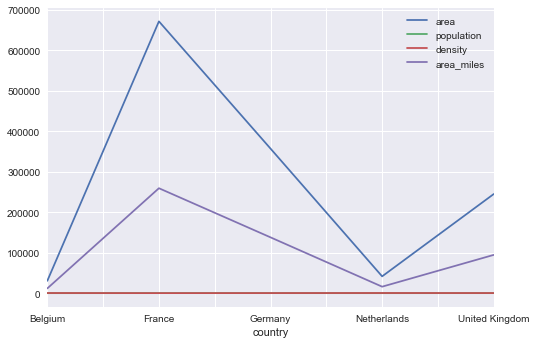

In [66]:
# velmi silna vlastnost je priamociare vykreslovanie
# countries.density.plot()
# countries.density.plot(kind='bar')
countries.plot()

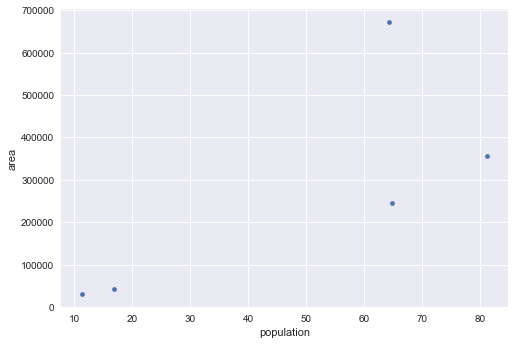

In [67]:
countries.plot(kind='scatter', x='population', y='area')

Kedze nam v `DataFrame` pribudla moznost vyberat stlpce podla nazvu, tak sa nam trochu skomplikovalo vyberanie prvkov oproti Numpy. Musime rozoznavat 
* vyberanie podla nazvu a 
* podla pozicie.


In [68]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [69]:
countries[['area', 'density']]

,area,density
country,,
Belgium,30510,370.370370
France,671308,95.783158
Germany,357050,227.699202
Netherlands,41526,406.973944
United Kingdom,244820,265.092721


In [70]:
# ked ale chceme rozsah, tak nam to pristupuje k riadkom
countries['France':'Netherlands']

,area,capital,population,density,area_miles
country,,,,,
France,671308,Paris,64.3,95.783158,259193.278739
Germany,357050,Berlin,81.3,227.699202,137857.675126
Netherlands,41526,Amsterdam,16.9,406.973944,16033.266538


Na pokrocilejsie vyberanie z tabulky pouzivame:
* `loc` a
* `iloc`

In [71]:
# pristup ku konkretnej bunke pomocou riadka a stlpca
countries.loc['Germany', 'area']

357050

In [72]:
# tu sa daju pouzit aj rozsahy na oboch rozmeroch
countries.loc['France':'Germany', :]

,area,capital,population,density,area_miles
country,,,,,
France,671308,Paris,64.3,95.783158,259193.278739
Germany,357050,Berlin,81.3,227.699202,137857.675126


In [73]:
# ale aj vymenovanie
countries.loc[countries['density']>300, ['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


In [74]:
# iloc vybera podla poradia. Toto je podobne pristupovaniu k prvkom ako v Numpy
countries.iloc[0:2,1:3]

,capital,population
country,,
Belgium,Brussels,11.3
France,Paris,64.3


In [75]:
# samozrejem, ze sa stale daju priradovat hodnoty
countries.loc['Belgium':'Germany', 'population'] = 10
countries

,area,capital,population,density,area_miles
country,,,,,
Belgium,30510,Brussels,10.0,370.370370,11779.968262
France,671308,Paris,10.0,95.783158,259193.278739
Germany,357050,Berlin,10.0,227.699202,137857.675126
Netherlands,41526,Amsterdam,16.9,406.973944,16033.266538
United Kingdom,244820,London,64.9,265.092721,94525.461488


## Zmena tvaru dat pomocou Pandas

In [76]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
# df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4), 'D':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


`unstack` presuva hodnoty v nejakom stlpci a vytvori z nich nazvy stlpcov

casto sa nam to hodi ak mame data, ktore su v trochu unej forme ako by sme potrebovali

In [77]:
from IPython.display import Image
Image("img/stack.png")

In [78]:
df = df.set_index(['A', 'B']) # najskor si vyberieme stlpec, ktory pouzijeme ako index. 
# Ten druhy bude dodavat hodnoty do nazvov novych stlpcov
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [79]:
# teraz si povieme, v ktorom stlpci su hodnoty a nechame to preskupit
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


### Kedy by som mohol potrebovat takuto transformaciu?

Predstavte si, ze mate logy nejakej aplikacie, kde mate id pouzivatela a nazov akcie, ktoru vykonal. Chcete vediet, kolko krat spravil rozne akcie kazdy pouzivatel a to vykreslit do obrazku.

In [80]:
row_count = 20
user_ids = np.random.choice([1,2,3,4], row_count)
actions = np.random.choice(['create', 'update', 'delete', 'retrieve', 'retrieve'], row_count)

df=pd.DataFrame({'user_id': user_ids, 'action': actions})
df.head()

,action,user_id
0,retrieve,2
1,retrieve,4
2,retrieve,2
3,delete,1
4,update,4


In [81]:
pom = df.groupby(['user_id', 'action']).size().reset_index() # operaciu groupby vam vysvetlim este raz kusok neskor
pom 

,user_id,action,0
0,1,delete,1
1,2,create,1
2,2,retrieve,3
3,2,update,1
4,3,retrieve,6
5,3,update,2
6,4,retrieve,5
7,4,update,1


In [82]:
pom = pom.set_index(['user_id', 'action'])
pom

0
user_id action     
1       delete    1
2       create    1
        retrieve  3
        update    1
3       retrieve  6
        update    2
4       retrieve  5
        update    1

In [83]:
pom[0].unstack()
# pom[0].unstack(fill_value=0)

action,create,delete,retrieve,update
user_id,,,,
1,NaN,1.0,NaN,NaN
2,1.0,NaN,3.0,1.0
3,NaN,NaN,6.0,2.0
4,NaN,NaN,5.0,1.0


### Opacna operacie je stack

In [84]:
# opacna transformacia je stack. zoberie nazvy stlpcov a spravi z nich hodnoty
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


Tato operacia sa pouziva napriklad, ak mate viacere pozorovania v jednom riadku a chcete ich rozdelit. Napriklad na riadku mate teplotu pocas roznych hodin dna a vy chcete mat na kazdom riadku len jednu hodnotu teploty a chcte mat namiesto toho 24 riadkov pre kazdy den.

In [85]:
from datetime import datetime, timedelta
row_count = 5
index = [datetime.now().date() - timedelta(days=i) for i in range(row_count, 0, -1)]
data = dict(zip(range(24), np.random.rand(24, row_count) * 5 + 20))
df = pd.DataFrame(index=index, data=data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2018-09-22,22.586480,24.130233,21.578316,21.534239,21.367359,23.354611,21.354546,24.674746,24.613385,23.098876,...,22.107970,23.821475,24.581317,24.297201,21.836564,22.866378,21.806291,22.686171,20.338102,23.732566
2018-09-23,23.167532,20.374435,23.150172,22.921825,22.814203,20.504348,22.865577,24.298999,21.259393,23.347690,...,23.136899,24.848425,22.393094,21.830844,24.649772,21.684526,20.061950,20.050494,23.730028,24.515025
2018-09-24,23.485831,22.337409,23.483157,23.682943,21.279801,24.233542,24.587882,20.670208,24.628676,23.453295,...,21.676473,22.981322,23.349172,20.442875,21.703447,24.313398,24.664507,22.216321,21.793550,23.326863
2018-09-25,20.178198,21.005523,22.868241,22.213732,22.696894,23.273428,22.118648,21.742894,22.634118,24.834045,...,21.000580,23.832458,23.582342,21.441319,24.232272,22.951247,20.960777,22.898183,20.953887,20.248261
2018-09-26,24.195469,23.395275,24.963833,21.410881,20.034121,22.017841,22.005243,23.342996,20.376944,21.047845,...,23.683158,20.176473,20.930039,24.928291,23.895317,24.966797,20.390756,23.121719,21.363848,21.598265


In [86]:
df.stack().reset_index(name='temperature')

,level_0,level_1,temperature
0,2018-09-22,0,22.586480
1,2018-09-22,1,24.130233
2,2018-09-22,2,21.578316
3,2018-09-22,3,21.534239
4,2018-09-22,4,21.367359
5,2018-09-22,5,23.354611
6,2018-09-22,6,21.354546
7,2018-09-22,7,24.674746
8,2018-09-22,8,24.613385
9,2018-09-22,9,23.098876


# Podobne ako unstack funguje aj pivot
Je to len specialny pripad predchadzajucich dvoch funkcii, ale je lahsie pochopitelny a pravdepodobne vam toto bude uplne stacit na vacsinu veci. Hlavne ako nahrada unstack

[pekny priklad s vysvetlenim](http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/)

In [87]:
# pivot je velmi podobny ako unstack, ale necha nastavit mena stlpcov a moze ich byt viac
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [88]:
df.pivot(index='A', columns='B', values='C')

B,a,b
A,,
one,0,1
two,2,3


In [89]:
# pivot_table je podobne ako pivot, ale dokaze pracovat s duplicitnymi stlpcami a necha vas definovat agregacnu funkciu
df = pd.DataFrame({'A':['one', 'one', 'two', 'two', 'one', 'two'], 'B':['a', 'b', 'a', 'b', 'a', 'b'], 'C':range(6)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3
4,one,a,4
5,two,b,5


In [90]:
df.pivot_table(index='A', columns='B', values='C', aggfunc=np.sum) #aggfunct je defaultne np.mean

B,a,b
A,,
one,4,1
two,2,8


## Dalsia casta operacia je groupby
urcite poznate z SQL

In [91]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


In [92]:
df.groupby('key').aggregate('sum') # df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


## Priklad groupby na realnom datasete

In [93]:
import airbase
no2 = airbase.load_data()

In [94]:
no2.head()

,BETR801,BETN029,FR04037,FR04012
1990-01-01 00:00:00,NaN,16.0,NaN,NaN
1990-01-01 01:00:00,NaN,18.0,NaN,NaN
1990-01-01 02:00:00,NaN,21.0,NaN,NaN
1990-01-01 03:00:00,NaN,26.0,NaN,NaN
1990-01-01 04:00:00,NaN,21.0,NaN,NaN


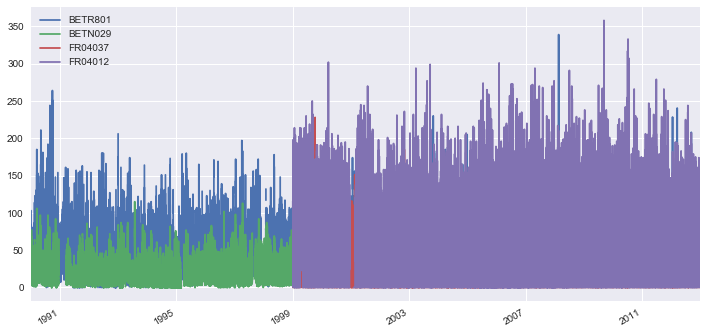

In [95]:
no2.plot(figsize=(12,6))

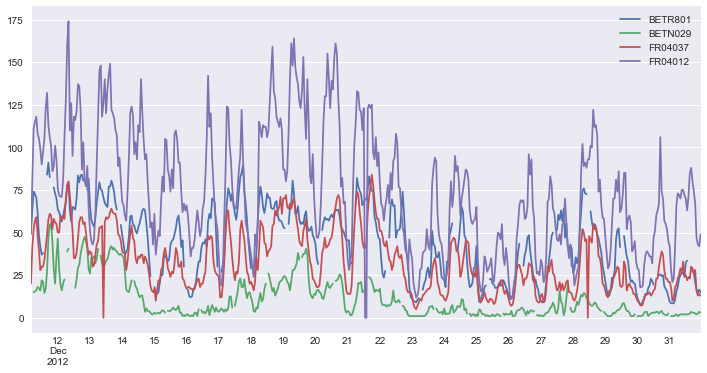

In [96]:
no2[-500:].plot(figsize=(12,6))

In [97]:
no2['month'] = no2.index.month
no2.head()

,BETR801,BETN029,FR04037,FR04012,month
1990-01-01 00:00:00,NaN,16.0,NaN,NaN,1
1990-01-01 01:00:00,NaN,18.0,NaN,NaN,1
1990-01-01 02:00:00,NaN,21.0,NaN,NaN,1
1990-01-01 03:00:00,NaN,26.0,NaN,NaN,1
1990-01-01 04:00:00,NaN,21.0,NaN,NaN,1


In [98]:
no2.groupby('month').mean()

,BETR801,BETN029,FR04037,FR04012
month,,,,
1,50.927088,20.304075,47.634409,82.472813
2,54.168021,19.938929,50.564499,83.973207
3,54.598322,19.424205,47.862715,96.272138
4,51.491741,18.183433,40.943117,95.962862
5,45.017861,15.381570,33.172575,89.523159
6,40.593695,11.484930,30.416467,91.036197
7,37.464715,11.117964,27.552373,88.314473
8,42.263092,12.435990,28.826405,79.596765
9,49.220250,14.605979,39.706019,93.000316


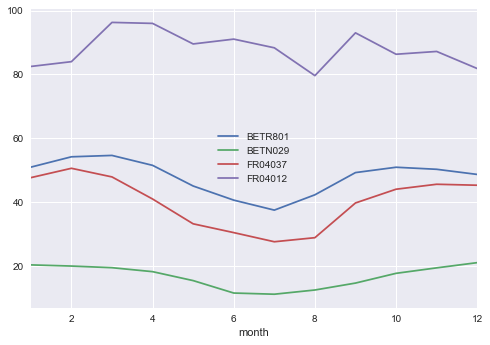

In [99]:
no2.groupby('month').mean().plot()

# Zopar dalsich uzitocnych veci pri praci s Pandas DataFrame

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv')
df.head()

,PLAYER,SALARY,GP,G,A,SOT,PPG,P
0,Sergio Agüero\n Forward — Manchester City,$19.2m,16.0,14,3.0,34,13.12,209.98
1,Eden Hazard\n Midfield — Chelsea,$18.9m,21.0,8,4.0,17,13.05,274.04
2,Alexis Sánchez\n Forward — Arsenal,$17.6m,NaN,12,7.0,29,11.19,223.86
3,Yaya Touré\n Midfield — Manchester City,$16.6m,18.0,7,1.0,19,10.99,197.91
4,Ángel Di María\n Midfield — Manchester United,$15.0m,13.0,3,NaN,13,10.17,132.23


In [101]:
# premenovanie vybranych stlpcov
df = df.rename(columns={'P': 'points', 
                        'GP': 'games',
                        'SOT': 'shots_on_target',
                        'G': 'goals',
                        'PPG': 'points_per_game',
                        'A': 'assists',})
df.head()

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points
0,Sergio Agüero\n Forward — Manchester City,$19.2m,16.0,14,3.0,34,13.12,209.98
1,Eden Hazard\n Midfield — Chelsea,$18.9m,21.0,8,4.0,17,13.05,274.04
2,Alexis Sánchez\n Forward — Arsenal,$17.6m,NaN,12,7.0,29,11.19,223.86
3,Yaya Touré\n Midfield — Manchester City,$16.6m,18.0,7,1.0,19,10.99,197.91
4,Ángel Di María\n Midfield — Manchester United,$15.0m,13.0,3,NaN,13,10.17,132.23


## Transformacia hodnot v stlpci

In [102]:
df['SALARY'] = df['SALARY'].apply(lambda x: x.strip('$m'))
df.head()

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points
0,Sergio Agüero\n Forward — Manchester City,19.2,16.0,14,3.0,34,13.12,209.98
1,Eden Hazard\n Midfield — Chelsea,18.9,21.0,8,4.0,17,13.05,274.04
2,Alexis Sánchez\n Forward — Arsenal,17.6,NaN,12,7.0,29,11.19,223.86
3,Yaya Touré\n Midfield — Manchester City,16.6,18.0,7,1.0,19,10.99,197.91
4,Ángel Di María\n Midfield — Manchester United,15.0,13.0,3,NaN,13,10.17,132.23


## Pridanie prazdneho stlpcu

In [103]:
df['team'] = pd.Series('', index=df.index)
df['position'] = pd.Series('', index=df.index)
df.head()

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position
0,Sergio Agüero\n Forward — Manchester City,19.2,16.0,14,3.0,34,13.12,209.98,,
1,Eden Hazard\n Midfield — Chelsea,18.9,21.0,8,4.0,17,13.05,274.04,,
2,Alexis Sánchez\n Forward — Arsenal,17.6,NaN,12,7.0,29,11.19,223.86,,
3,Yaya Touré\n Midfield — Manchester City,16.6,18.0,7,1.0,19,10.99,197.91,,
4,Ángel Di María\n Midfield — Manchester United,15.0,13.0,3,NaN,13,10.17,132.23,,


## Transformacia ineho stlpca  a naplnenie dalsich

In [104]:
def process_player_col(text):
    name, rest = text.split('\n')
    position, team = [x.strip() for x in rest.split(' — ')]
    return pd.Series([name, team, position])

df[['PLAYER', 'team', 'position']] = df.PLAYER.apply(process_player_col)
df.head()

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position
0,Sergio Agüero,19.2,16.0,14,3.0,34,13.12,209.98,Manchester City,Forward
1,Eden Hazard,18.9,21.0,8,4.0,17,13.05,274.04,Chelsea,Midfield
2,Alexis Sánchez,17.6,NaN,12,7.0,29,11.19,223.86,Arsenal,Forward
3,Yaya Touré,16.6,18.0,7,1.0,19,10.99,197.91,Manchester City,Midfield
4,Ángel Di María,15.0,13.0,3,NaN,13,10.17,132.23,Manchester United,Midfield


In [105]:
df['bla'] = pd.Series('', index=df.index)

## Zistenie, kolko riadkov a stlpcov ma prazdne hodnoty

Pocet riadkov s aspon jednou prazdnou hodnotou

In [106]:
df.shape[0] - df.dropna().shape[0]

3

Pocet prazdnych hodnot v stlpcoch

In [107]:
df.isnull().sum()

PLAYER             0
SALARY             0
games              1
goals              0
assists            2
shots_on_target    0
points_per_game    0
points             1
team               0
position           0
bla                0
dtype: int64

Pocet pradnych hodnot v riadkoch

In [108]:
df.isnull().sum(axis=1)

0    0
1    0
2    1
3    0
4    1
5    2
6    0
7    0
8    0
9    0
dtype: int64

Celkovy pocet prazdnych hodnot v datach

In [109]:
df.isnull().sum().sum()

4

## Vyber riadkov, kde su prazdne hodnoty

Na zaklade jedneho atributu

In [110]:
df[df['assists'].isnull()]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
4,Ángel Di María,15.0,13.0,3,NaN,13,10.17,132.23,Manchester United,Midfield,
5,Santiago Cazorla,14.8,20.0,4,NaN,20,9.97,NaN,Arsenal,Midfield,


Riadky, v ktorych je aspon jedna prazdna hodnota

In [111]:
df[df.isnull().any(axis=1)]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
2,Alexis Sánchez,17.6,NaN,12,7.0,29,11.19,223.86,Arsenal,Forward,
4,Ángel Di María,15.0,13.0,3,NaN,13,10.17,132.23,Manchester United,Midfield,
5,Santiago Cazorla,14.8,20.0,4,NaN,20,9.97,NaN,Arsenal,Midfield,


## Vyber plnych riadkov

Na zaklade jedneho atributu

In [112]:
df[df['assists'].notnull()]
# df[~df['assists'].isnull()]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
0,Sergio Agüero,19.2,16.0,14,3.0,34,13.12,209.98,Manchester City,Forward,
1,Eden Hazard,18.9,21.0,8,4.0,17,13.05,274.04,Chelsea,Midfield,
2,Alexis Sánchez,17.6,NaN,12,7.0,29,11.19,223.86,Arsenal,Forward,
3,Yaya Touré,16.6,18.0,7,1.0,19,10.99,197.91,Manchester City,Midfield,
6,David Silva,14.3,15.0,6,2.0,11,10.35,155.26,Manchester City,Midfield,
7,Cesc Fàbregas,14.0,20.0,2,14.0,10,10.47,209.49,Chelsea,Midfield,
8,Saido Berahino,13.8,21.0,9,0.0,20,7.02,147.43,West Brom,Forward,
9,Steven Gerrard,13.8,20.0,5,1.0,11,7.50,150.01,Liverpool,Midfield,


Na zaklade vsetkych atributov

In [113]:
df[df.notnull().all(axis=1)]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
0,Sergio Agüero,19.2,16.0,14,3.0,34,13.12,209.98,Manchester City,Forward,
1,Eden Hazard,18.9,21.0,8,4.0,17,13.05,274.04,Chelsea,Midfield,
3,Yaya Touré,16.6,18.0,7,1.0,19,10.99,197.91,Manchester City,Midfield,
6,David Silva,14.3,15.0,6,2.0,11,10.35,155.26,Manchester City,Midfield,
7,Cesc Fàbregas,14.0,20.0,2,14.0,10,10.47,209.49,Chelsea,Midfield,
8,Saido Berahino,13.8,21.0,9,0.0,20,7.02,147.43,West Brom,Forward,
9,Steven Gerrard,13.8,20.0,5,1.0,11,7.50,150.01,Liverpool,Midfield,


Jednoduchsie

In [114]:
df.dropna()

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
0,Sergio Agüero,19.2,16.0,14,3.0,34,13.12,209.98,Manchester City,Forward,
1,Eden Hazard,18.9,21.0,8,4.0,17,13.05,274.04,Chelsea,Midfield,
3,Yaya Touré,16.6,18.0,7,1.0,19,10.99,197.91,Manchester City,Midfield,
6,David Silva,14.3,15.0,6,2.0,11,10.35,155.26,Manchester City,Midfield,
7,Cesc Fàbregas,14.0,20.0,2,14.0,10,10.47,209.49,Chelsea,Midfield,
8,Saido Berahino,13.8,21.0,9,0.0,20,7.02,147.43,West Brom,Forward,
9,Steven Gerrard,13.8,20.0,5,1.0,11,7.50,150.01,Liverpool,Midfield,


## Spajanie podmienok

In [115]:
df[ (df['team'] == 'Arsenal') | (df['team'] == 'Chelsea') ]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
1,Eden Hazard,18.9,21.0,8,4.0,17,13.05,274.04,Chelsea,Midfield,
2,Alexis Sánchez,17.6,NaN,12,7.0,29,11.19,223.86,Arsenal,Forward,
5,Santiago Cazorla,14.8,20.0,4,NaN,20,9.97,NaN,Arsenal,Midfield,
7,Cesc Fàbregas,14.0,20.0,2,14.0,10,10.47,209.49,Chelsea,Midfield,


In [116]:
df[ (df['team'] == 'Arsenal') & (df['position'] == 'Forward') ]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
2,Alexis Sánchez,17.6,NaN,12,7.0,29,11.19,223.86,Arsenal,Forward,


# Nejake zdroje na studium
* http://nbviewer.jupyter.org/format/slides/github/jorisvandenbossche/2015-PyDataParis/blob/master/pandas_introduction.ipynb
* http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb
* [Pandas Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Pandas_Cheat_Sheet_2.pdf), [nejaky komentar k tomu](http://www.kdnuggets.com/2017/01/pandas-cheat-sheet.html)

# Nejake dalsie nastroje
* [OpenRefine](http://openrefine.org/) - standalone nastroj na cistenie a pozeranie sa do dat
* [Trifacta](https://www.trifacta.com/products/wrangler/)

## SQL v Pandas

In [118]:
from pandasql import sqldf

In [119]:
from pandasql import load_meat, load_births

meat = load_meat()
births = load_births()

In [120]:
type(meat)

pandas.core.frame.DataFrame

In [121]:
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [122]:
births.head()

,date,births
0,1975-01-01,265775
1,1975-02-01,241045
2,1975-03-01,268849
3,1975-04-01,247455
4,1975-05-01,254545


In [123]:
data = {'meat': meat}

In [124]:
sqldf('select * from meat limit 10', data)

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01 00:00:00.000000,751.0,85.0,1280.0,89.0,None,None,None
1,1944-02-01 00:00:00.000000,713.0,77.0,1169.0,72.0,None,None,None
2,1944-03-01 00:00:00.000000,741.0,90.0,1128.0,75.0,None,None,None
3,1944-04-01 00:00:00.000000,650.0,89.0,978.0,66.0,None,None,None
4,1944-05-01 00:00:00.000000,681.0,106.0,1029.0,78.0,None,None,None
5,1944-06-01 00:00:00.000000,658.0,125.0,962.0,79.0,None,None,None
6,1944-07-01 00:00:00.000000,662.0,142.0,796.0,82.0,None,None,None
7,1944-08-01 00:00:00.000000,787.0,175.0,748.0,87.0,None,None,None
8,1944-09-01 00:00:00.000000,774.0,182.0,678.0,91.0,None,None,None
9,1944-10-01 00:00:00.000000,834.0,215.0,777.0,100.0,None,None,None


In [125]:
data2 = {'meat2': meat}

In [126]:
sqldf('select * from meat2 limit 10', data2)

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01 00:00:00.000000,751.0,85.0,1280.0,89.0,None,None,None
1,1944-02-01 00:00:00.000000,713.0,77.0,1169.0,72.0,None,None,None
2,1944-03-01 00:00:00.000000,741.0,90.0,1128.0,75.0,None,None,None
3,1944-04-01 00:00:00.000000,650.0,89.0,978.0,66.0,None,None,None
4,1944-05-01 00:00:00.000000,681.0,106.0,1029.0,78.0,None,None,None
5,1944-06-01 00:00:00.000000,658.0,125.0,962.0,79.0,None,None,None
6,1944-07-01 00:00:00.000000,662.0,142.0,796.0,82.0,None,None,None
7,1944-08-01 00:00:00.000000,787.0,175.0,748.0,87.0,None,None,None
8,1944-09-01 00:00:00.000000,774.0,182.0,678.0,91.0,None,None,None
9,1944-10-01 00:00:00.000000,834.0,215.0,777.0,100.0,None,None,None


In [127]:
sqldf('select * from meat limit 10', locals())

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01 00:00:00.000000,751.0,85.0,1280.0,89.0,None,None,None
1,1944-02-01 00:00:00.000000,713.0,77.0,1169.0,72.0,None,None,None
2,1944-03-01 00:00:00.000000,741.0,90.0,1128.0,75.0,None,None,None
3,1944-04-01 00:00:00.000000,650.0,89.0,978.0,66.0,None,None,None
4,1944-05-01 00:00:00.000000,681.0,106.0,1029.0,78.0,None,None,None
5,1944-06-01 00:00:00.000000,658.0,125.0,962.0,79.0,None,None,None
6,1944-07-01 00:00:00.000000,662.0,142.0,796.0,82.0,None,None,None
7,1944-08-01 00:00:00.000000,787.0,175.0,748.0,87.0,None,None,None
8,1944-09-01 00:00:00.000000,774.0,182.0,678.0,91.0,None,None,None
9,1944-10-01 00:00:00.000000,834.0,215.0,777.0,100.0,None,None,None


In [128]:
sqldf('select * from births limit 10', locals())

,date,births
0,1975-01-01 00:00:00.000000,265775
1,1975-02-01 00:00:00.000000,241045
2,1975-03-01 00:00:00.000000,268849
3,1975-04-01 00:00:00.000000,247455
4,1975-05-01 00:00:00.000000,254545
5,1975-06-01 00:00:00.000000,254096
6,1975-07-01 00:00:00.000000,275163
7,1975-08-01 00:00:00.000000,281300
8,1975-09-01 00:00:00.000000,270738
9,1975-10-01 00:00:00.000000,265494


In [129]:
q = """
    SELECT
        m.date
        , b.births
        , m.beef
    FROM
        meat m
    INNER JOIN
        births b
            on m.date = b.date
    ORDER BY
        m.date
    LIMIT 100;
    """

joined = sqldf(q, locals())
print(joined.head())

                         date  births    beef
0  1975-01-01 00:00:00.000000  265775  2106.0
1  1975-02-01 00:00:00.000000  241045  1845.0
2  1975-03-01 00:00:00.000000  268849  1891.0
3  1975-04-01 00:00:00.000000  247455  1895.0
4  1975-05-01 00:00:00.000000  254545  1849.0


Pandasql bezi na SQLite3, takze vsetky klasicke opercaie v SQL viete robit aj tu. Funguju podmienky, vnorene dopyty, joiny, union, funkcie, ...

# Dalsie velmi pekne navody na pracu s datami pomocou Pandas

toto su notebooky jedneho celeho stretnutia, kde robili celkom dlhy tutorial
https://github.com/ResearchComputing/Meetup-Fall-2013

Vybrane konkretne casti, ktore su pre nas specialne zaujimave:

* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_10_pandas_introduction.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_11_pandas_adding_data.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_12_pandas_groupby.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_13_pandas_movies.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_14_pandas_reshape.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_15_pandas_transforming.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_21_pandas_processing.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_22_pandas_cleaning.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_23_titanic_example.ipynb

# Kde si dalej precvicit pouzivanie Pandas a Numpy


### Numpy
* 100 uloh aj so vzorovymi rieseniami - https://github.com/rougier/numpy-100
* Dalsie ulohy aj s rieseniami - https://www.w3resource.com/python-exercises/numpy/index.php
* Cheat Sheet - https://www.datacamp.com/community/blog/python-numpy-cheat-sheet

### Pandas
* 100 uloh aj so vzorovymi rieseniami - https://github.com/ajcr/100-pandas-puzzles
* Dalsie ulohy aj s rieseniami - https://www.w3resource.com/python-exercises/pandas/index.php
* Tutorial priamo z dokumentacie ku kniznici - https://pandas.pydata.org/pandas-docs/stable/tutorials.html 
* Ulohy na roznych skutocnych datasetoch - https://github.com/guipsamora/pandas_exercises
* Pandas Cheat Sheet - https://www.datacamp.com/community/blog/python-pandas-cheat-sheet
* Data Wrangling in Python Cheat Sheet - https://www.datacamp.com/community/blog/pandas-cheat-sheet-python


# Spätná väzba: tinyurl.com/iau2018-19